###Setting up  the enviroment and downloading the datasets



In [0]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [224]:
link = 'https://drive.google.com/open?id=1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD' # The shareable link
base_dp = 'https://drive.google.com/open?id=1kf85Br9YVKUCTAFt1XQAWnVgXkyh2qsx'
policiais_mortos_link = 'https://drive.google.com/open?id=1vYPSTopm0MJ53PdF6l_L1iu1R_ghncD5' 
populacao = 'https://drive.google.com/open?id=1LwXhSAKn1iMpxVzp9Rw1lNDmuX-CPDZN'
feminicidio = 'https://drive.google.com/open?id=1JAd-cliUKk_CwVCJ0xk0db0seeMe0Err'
delegacias = 'https://drive.google.com/open?id=12fU3Y_TjyiBRqrlxkRUgmzbvX9Nkbl63'

fluff, id = link.split('=')
fluff, id_2 = base_dp.split('=')
fluff, id_3 = policiais_mortos_link.split('=')
fluff, id_4 = populacao.split('=')
fluff, id_5 = feminicidio.split('=')
fluff, id_6 = delegacias.split('=')

print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('fogo-cruzado.csv') 
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile('BaseDPEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_3}) 
downloaded.GetContentFile('PoliciaisMortos.csv')
downloaded = drive.CreateFile({'id':id_4}) 
downloaded.GetContentFile('PopulacaoEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_5}) 
downloaded.GetContentFile('BaseFeminicidioEvolucaoMensalCisp.csv')
downloaded = drive.CreateFile({'id':id_6}) 
downloaded.GetContentFile('delegacias.csv')

1gXJhtcrcZ-7jFsRfTZXXFcVBKlRA-5qD


### População Mensal

In [0]:
data_population = pd.read_csv('PopulacaoEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')

In [226]:
data_population.head()

,CISP,mes,vano,pop_circ
0,1,1,2003,1545.224947
1,1,2,2003,1546.207291
2,1,3,2003,1547.190259
3,1,4,2003,1548.173852
4,1,5,2003,1549.158071


In [227]:
data_population.shape

(28265, 4)

### Base DP que contém todos os crimes

In [228]:
data_crimes = pd.read_csv('BaseDPEvolucaoMensalCisp.csv', encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.



In [229]:
data_crimes.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,NaN,4,100,12,30,0,37,NaN,90,169,0,1,0,69,1,,,,5,NaN,NaN,NaN,NaN,21,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,NaN,11,82,9,42,5,23,NaN,36,115,0,1,0,1,35,,,,7,NaN,NaN,NaN,NaN,15,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,NaN,24,123,28,42,2,47,NaN,97,216,0,0,0,37,4,,,,10,NaN,NaN,NaN,NaN,47,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,NaN,38,143,17,4,0,8,NaN,61,90,0,0,0,8,20,,,,77,NaN,NaN,NaN,NaN,26,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,NaN,23,55,12,1,0,1,NaN,21,35,0,0,0,4,3,,,,9,NaN,NaN,NaN,NaN,10,1,3,0,0,0,4,5,23,147,3


In [230]:
# verifying null
data_crimes.isnull().sum()

CISP                              0
mes                               0
vano                              0
mes_ano                           0
AISP                              0
RISP                              0
munic                             0
mcirc                             0
Regiao                            0
hom_doloso                        0
lesao_corp_morte                  0
latrocinio                        0
hom_por_interv_policial           0
tentat_hom                        0
lesao_corp_dolosa                 0
estupro                           0
hom_culposo                       0
lesao_corp_culposa                0
roubo_comercio                    0
roubo_residencia                  0
roubo_veiculo                     0
roubo_carga                       0
roubo_transeunte                  0
roubo_em_coletivo                 0
roubo_banco                       0
roubo_cx_eletronico              19
roubo_celular                     0
roubo_conducao_saque        

Vamos tratar os nulls por 0

In [0]:
data_crimes = data_crimes.replace(r'^\s*$', np.nan, regex=True)  #campos com apenas espaços em branco são substituidos por NaN

In [232]:
data_crimes = data_crimes.fillna(0) # substitui todos os campos vazios com 0
data_crimes.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,3


In [233]:
data_crimes.isnull().sum()

CISP                          0
mes                           0
vano                          0
mes_ano                       0
AISP                          0
RISP                          0
munic                         0
mcirc                         0
Regiao                        0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
hom_por_interv_policial       0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_comercio                0
roubo_residencia              0
roubo_veiculo                 0
roubo_carga                   0
roubo_transeunte              0
roubo_em_coletivo             0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_celular                 0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
                             ..
furto_tr

Os campos de texto também tem espaços extras que atrapalham no agrupamento. Retiramos esses espaços:

In [0]:
data_crimes['munic'] = data_crimes['munic'].str.strip()

In [0]:
data_crimes['Regiao'] = data_crimes['Regiao'].str.strip()

In [0]:
data_crimes = data_crimes.drop('fase', 1)

###Join dos datasets Base DP e População

In [237]:
crimes_pop = pd.merge(data_crimes, data_population, how="inner", on=['CISP', 'mes', 'vano'])
crimes_pop.shape

(26739, 63)

In [238]:
crimes_pop['per100k_ratio'] = crimes_pop['pop_circ'] / 100000
crimes_pop.head()

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ,per100k_ratio
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,0,0,0,1,40,0,1,15,14,0,5,1,26,8,0,0.0,32,0,10,0.0,4,100,12,30,0,37,0.0,90,169,0,1,0,69,1,0,0,0,5,0.0,0.0,0.0,0.0,21,2,0,0,0,0,0,66,5,578,1545.224947,0.015452
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,0,47,1,4,35,5,0,9,1,25,12,0,1.0,14,1,3,0.0,11,82,9,42,5,23,0.0,36,115,0,1,0,1,35,0,0,0,7,0.0,0.0,0.0,0.0,15,6,0,1,0,0,3,51,9,441,29790.394890,0.297904
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,0,0,0,1,73,2,1,19,10,1,11,5,26,4,2,0.0,34,2,4,0.0,24,123,28,42,2,47,0.0,97,216,0,0,0,37,4,0,0,0,10,0.0,0.0,0.0,0.0,47,2,1,0,0,0,3,64,11,637,35656.959900,0.356570
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,0,0,0,2,43,2,1,20,10,0,27,6,14,22,0,0.0,20,0,6,0.0,38,143,17,4,0,8,0.0,61,90,0,0,0,8,20,0,0,0,77,0.0,0.0,0.0,0.0,26,2,1,0,0,0,6,56,27,473,76271.404050,0.762714
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,0,0,0,2,18,2,0,2,0,2,23,1,4,0,0,0.0,1,0,1,0.0,23,55,12,1,0,1,0.0,21,35,0,0,0,4,3,0,0,0,9,0.0,0.0,0.0,0.0,10,1,3,0,0,0,4,5,23,147,38659.030110,0.386590


Dados normalizados por 100k habitantes

In [239]:
cols = crimes_pop.columns[9:-2]
# cols
data_per100k = crimes_pop.copy()
data_per100k[cols].astype(float)
data_per100k['posse_drogas'] = pd.to_numeric(data_per100k['posse_drogas'], errors='coerce')
data_per100k['trafico_drogas']  = pd.to_numeric(data_per100k['trafico_drogas'], errors='coerce')
data_per100k['apreensao_drogas_sem_autor']  = pd.to_numeric(data_per100k['apreensao_drogas_sem_autor'], errors='coerce')

for c in cols:
    data_per100k[c] = data_per100k[c] * data_per100k['per100k_ratio']
    
data_per100k.head(5)

,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,pop_circ,per100k_ratio
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0.000000,0.0,0.0,0.0,0.015452,0.618090,0.000000,0.015452,0.231784,0.216331,0.000000,0.077261,0.015452,0.401758,0.123618,0.000000,0.000000,0.494472,0.000000,0.154522,0.0,0.061809,1.545225,0.185427,0.463567,0.000000,0.571733,0.0,1.390702,2.611430,0.0,0.015452,0.0,1.066205,0.015452,0.0,0.0,0.0,0.077261,0.0,0.0,0.0,0.0,0.324497,0.030904,0.000000,0.000000,0.0,0.0,0.000000,1.019848,0.077261,8.931400,1545.224947,0.015452
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0.893712,0.0,0.0,0.0,0.000000,14.001486,0.297904,1.191616,10.426638,1.489520,0.000000,2.681136,0.297904,7.447599,3.574847,0.000000,0.297904,4.170655,0.297904,0.893712,0.0,3.276943,24.428124,2.681136,12.511966,1.489520,6.851791,0.0,10.724542,34.258954,0.0,0.297904,0.0,0.297904,10.426638,0.0,0.0,0.0,2.085328,0.0,0.0,0.0,0.0,4.468559,1.787424,0.000000,0.297904,0.0,0.0,0.893712,15.193101,2.681136,131.375641,29790.394890,0.297904
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,1.069709,0.0,0.0,0.0,0.356570,26.029581,0.713139,0.356570,6.774822,3.565696,0.356570,3.922266,1.782848,9.270810,1.426278,0.713139,0.000000,12.123366,0.713139,1.426278,0.0,8.557670,43.858061,9.983949,14.975923,0.713139,16.758771,0.0,34.587251,77.019033,0.0,0.000000,0.0,13.193075,1.426278,0.0,0.0,0.0,3.565696,0.0,0.0,0.0,0.0,16.758771,0.713139,0.356570,0.000000,0.0,0.0,1.069709,22.820454,3.922266,227.134835,35656.959900,0.356570
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4.576284,0.0,0.0,0.0,1.525428,32.796704,1.525428,0.762714,15.254281,7.627140,0.000000,20.593279,4.576284,10.677997,16.779709,0.000000,0.000000,15.254281,0.000000,4.576284,0.0,28.983134,109.068108,12.966139,3.050856,0.000000,6.101712,0.0,46.525556,68.644264,0.0,0.000000,0.0,6.101712,15.254281,0.0,0.0,0.0,58.728981,0.0,0.0,0.0,0.0,19.830565,1.525428,0.762714,0.000000,0.0,0.0,4.576284,42.711986,20.593279,360.763741,76271.404050,0.762714
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,1.546361,0.0,0.0,0.0,0.773181,6.958625,0.773181,0.000000,0.773181,0.000000,0.773181,8.891577,0.386590,1.546361,0.000000,0.000000,0.000000,0.386590,0.000000,0.386590,0.0,8.891577,21.262467,4.639084,0.386590,0.000000,0.386590,0.0,8.118396,13.530661,0.0,0.000000,0.0,1.546361,1.159771,0.0,0.0,0.0,3.479313,0.0,0.0,0.0,0.0,3.865903,0.386590,1.159771,0.000000,0.0,0.0,1.546361,1.932952,8.891577,56.828774,38659.030110,0.386590


In [0]:
tmp_data = data_crimes.groupby(['munic'], as_index=False)[data_crimes.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_munic = tmp_data
total_crimes_munic = total_crimes_munic.sort_values(['total_crime'], ascending=[False])


In [0]:
tmp_data = data_per100k.groupby(['munic'], as_index=False)[ data_per100k.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_munic_100k = tmp_data
total_crimes_munic_100k = total_crimes_munic_100k.sort_values(['total_crime'], ascending=[False])


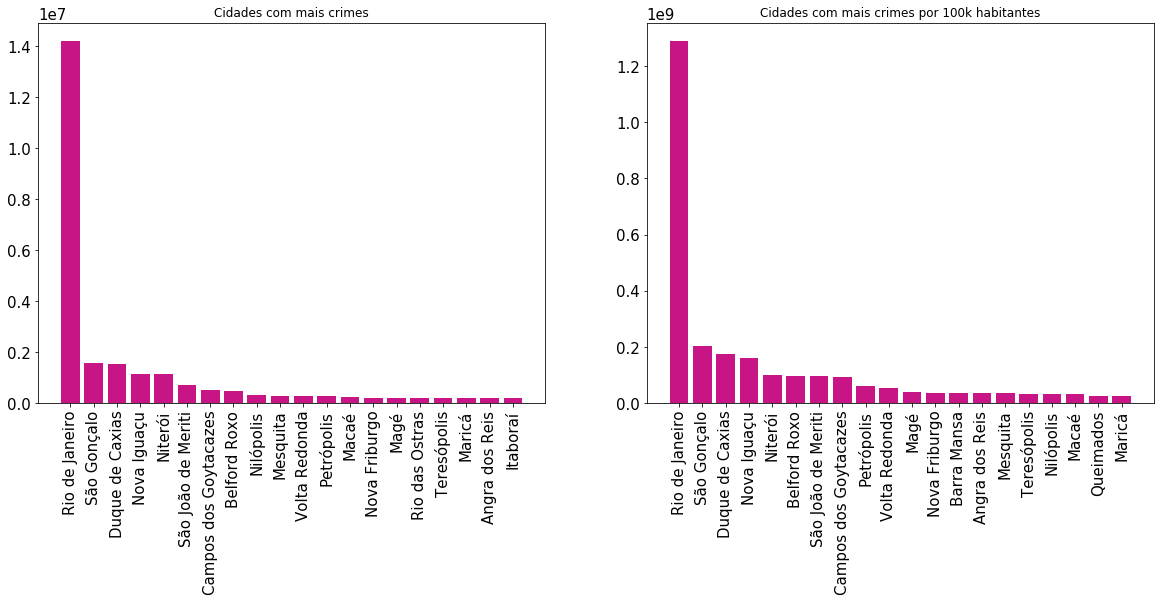

In [358]:
f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(20)

plt.bar(y_pos, total_crimes_munic['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic['munic'].head(20), rotation = 90)
plt.title('Cidades com mais crimes')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_munic_100k['total_crime'].head(20), align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_munic_100k['munic'].head(20), rotation = 90)
plt.title('Cidades com mais crimes por 100k habitantes')

plt.show()





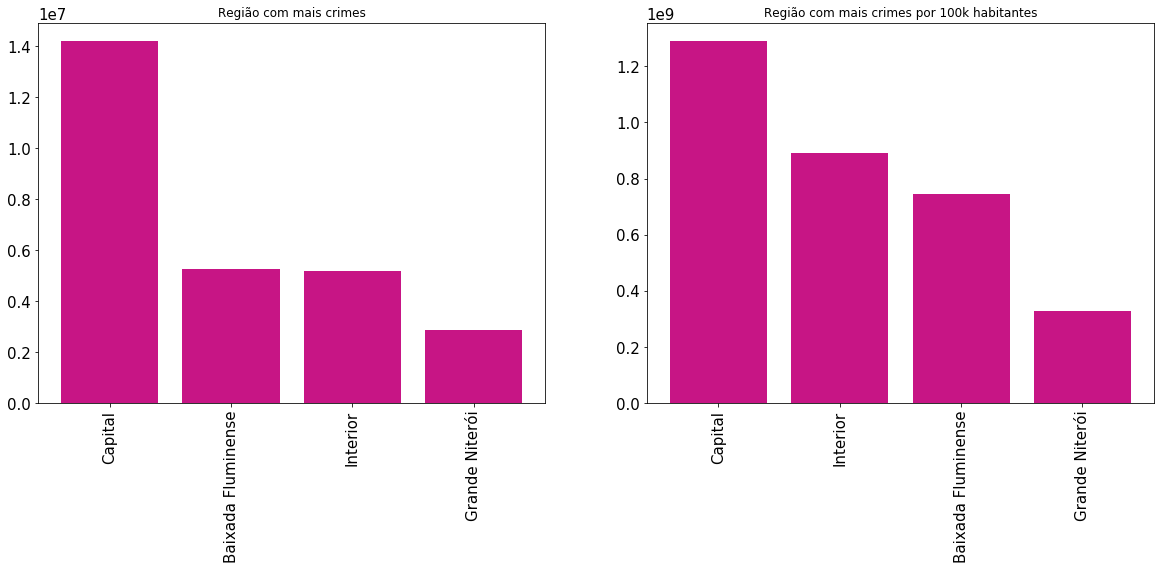

In [365]:

tmp_data = data_crimes.groupby(['Regiao'], as_index=False)[data_crimes.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao = tmp_data
total_crimes_regiao = total_crimes_regiao.sort_values(['total_crime'], ascending=[False])

tmp_data = data_per100k.groupby(['Regiao'], as_index=False)[data_per100k.columns[9:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 9:].sum(axis=1)
total_crimes_regiao_100k = tmp_data
total_crimes_regiao_100k = total_crimes_regiao_100k.sort_values(['total_crime'], ascending=[False])

f = plt.figure(figsize=(20,7))

#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(1,2,1)

y_pos = np.arange(4)

plt.bar(y_pos, total_crimes_regiao['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos,total_crimes_regiao['Regiao'], rotation = 90)
plt.title('Região com mais crimes')

plt.subplot(1,2,2)
plt.bar(y_pos, total_crimes_regiao_100k['total_crime'], align='center', color = 'mediumvioletred')
plt.xticks(y_pos, total_crimes_regiao_100k['Regiao'], rotation = 90)
plt.title('Região com mais crimes por 100k habitantes')

plt.show()

Retirei colunas de texto, total_furtos e total_roubos já que é informação repetida

**apf significa Auto de Prisão em Flagrante**  
**cmp significa Cumprimento de Mandado de Prisão**

Não são necessáriamente crimes, talvez seja melhor tirar para essa análise



In [0]:
delete_columns = ['apf', 'aaapai', 'cmp', 'cmba', 'recuperacao_veiculos', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']
common_crimes = data_crimes.drop(delete_columns, 1).sum(axis = 0, skipna = True)[9:-2].sort_values(ascending=False)[2:]

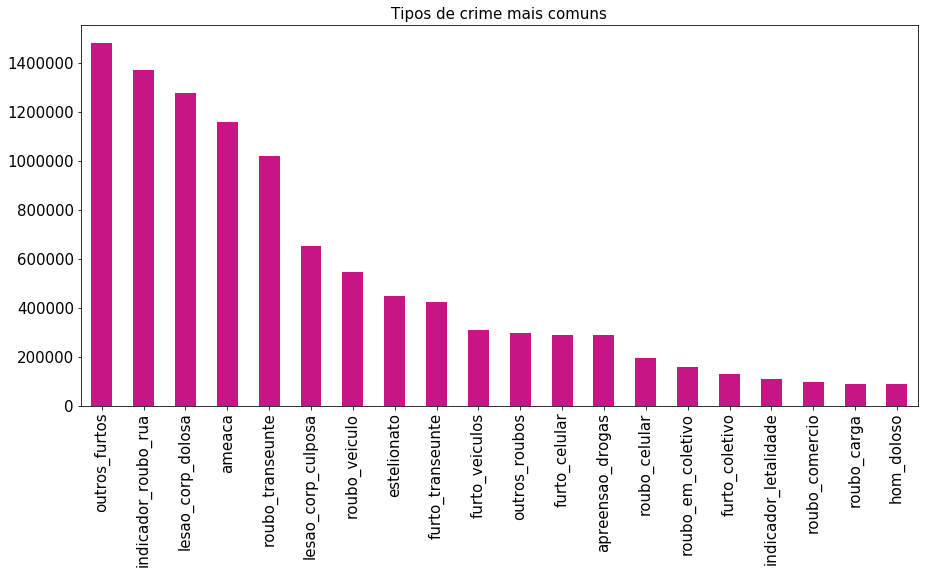

In [245]:
common_crimes[:20].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.title('Tipos de crime mais comuns',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

Agrupando crimes por Ano e Mês

In [246]:
delete_columns = ['CISP', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc', 'apf', 'Regiao','aaapai', 'cmp', 'cmba', 'recuperacao_veiculos', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv']

tmp_data = data_crimes.drop(delete_columns, 1)
tmp_data = tmp_data[tmp_data.columns[:-2]]

tmp_data = tmp_data.groupby(['vano', 'mes'], as_index=False)[tmp_data.columns[2:]].sum()
tmp_data['total_crime']= tmp_data.iloc[:, 2:].sum(axis=1)
total_crimes = tmp_data
total_crimes.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,ameaca,indicador_letalidade,indicador_roubo_rua,total_crime
0,2003,1,589,6,20,90,365,6896,245,163,3097,589,172,3236,357,1427,658,5,1.0,966,18,210,0.0,2657,10296,1940,983,49,760,0.0,6751,10483,2,23,0,885,1003,6127,705,3051,64825.0
1,2003,2,583,4,12,111,361,7099,221,188,3207,720,170,3169,443,1532,691,12,0.0,963,20,234,0.0,2680,10634,1732,858,53,648,0.0,7044,10335,3,29,0,802,1159,6047,710,3186,65660.0
2,2003,3,613,5,16,113,332,6968,236,188,2993,640,178,2923,310,1537,683,8,1.0,982,33,189,0.0,2492,9976,1833,943,55,647,0.0,7498,10976,0,30,0,821,1133,5793,747,3202,65094.0
3,2003,4,585,11,14,125,297,6441,215,207,3083,702,169,2966,303,1529,624,10,0.0,1007,37,232,0.0,2643,10222,1694,780,57,540,0.0,7338,10409,3,41,0,819,1061,5626,735,3160,63685.0
4,2003,5,599,6,20,96,381,5843,189,228,3282,712,188,3167,345,1558,663,3,1.0,1072,26,273,0.0,2867,10875,1805,812,57,554,0.0,7186,10414,2,57,0,874,1019,5436,721,3293,64624.0


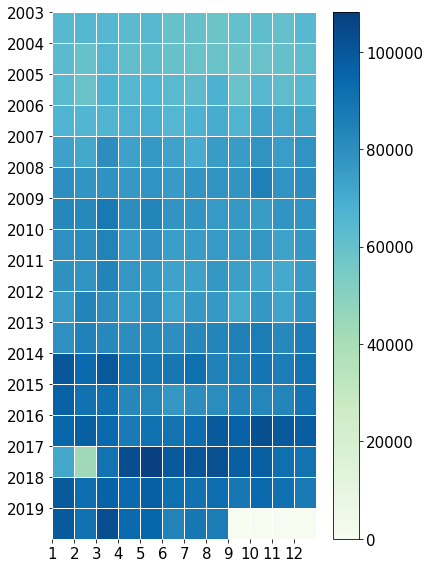

In [247]:
years = total_crimes['vano'].drop_duplicates()
months = total_crimes['mes'].drop_duplicates()

tmp_array = np.array(total_crimes['total_crime'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)


plt.colorbar(im)

fig.tight_layout()
plt.show()

**Outlier em Fevereiro de 2017**  
Motivo?

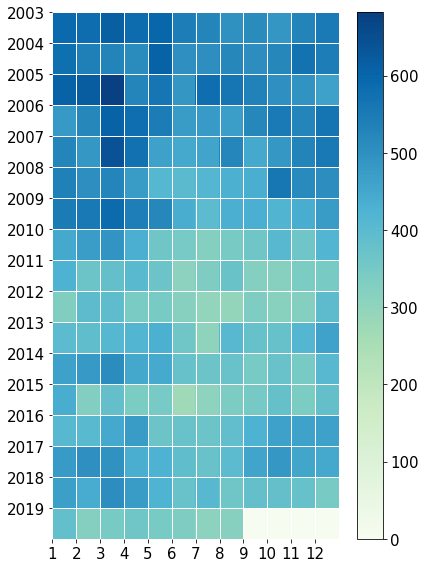

In [248]:
tmp_array = np.array(total_crimes['hom_doloso'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)


plt.colorbar(im)

fig.tight_layout()
plt.show()

**Homicídios dimunindo com o tempo.**
Motivo?

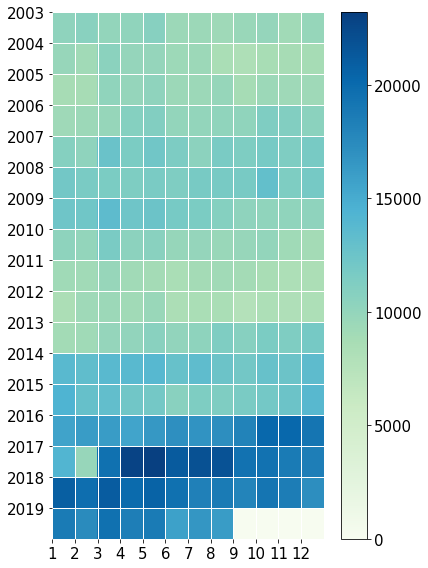

In [249]:
tmp_array = np.array(total_crimes['total_roubos'])
tmp_array = np.append(tmp_array, [0,0,0,0])  # faltam 4 meses para 2019, preenchi com 0s
tmp_array = np.array(tmp_array).reshape(17,12)

extent = (0, tmp_array.shape[1], tmp_array.shape[0], 0)

fig, ax = plt.subplots(figsize=(6,8))
im = ax.imshow(tmp_array, aspect='auto', extent=extent, cmap = 'GnBu')

ax = plt.gca()

ax.grid(color='w', linewidth=1)
ax.set_frame_on(False)

ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(months)
ax.set_yticklabels(years)


plt.colorbar(im)

fig.tight_layout()
plt.show()

### Delegacias

In [250]:
delegacias_df = pd.read_csv('delegacias.csv', sep=';', encoding='latin-1')

# check the shape of the data
delegacias_df.shape

(138, 4)

In [251]:
delegacias_df.head()

,CISP,nome,endereco,delegado
0,1,001Âª DP â PraÃ§a MauÃ¡,Atendendo provisÃ³riamente na sede da 4ÂªDP,ClÃ¡udio Vieira de Campos
1,4,004Âª DP â PraÃ§a da RepÃºblica,"PraÃ§a Cristiano Ottoni, s/nÂº",Daniel Mayr Pereira da CostaÂ
2,5,005Âª DP â Mem de SÃ¡,"Av. Gomes Freire, 320 - Centro",Marcus Henrique de Oliveira AlvesÂ
3,6,006Âª DP â Cidade Nova,"Rua Prof. Clementino Fraga, 77",Maria Aparecida Salgado MalletÂ
4,7,007Âª DP â Santa Teresa,"Rua Francisco de Castro, 5",Orlando Zaccone D Elia Filho


### Fogo Cruzado

In [252]:
# reading the dataset

data = pd.read_csv('fogo-cruzado.csv', encoding='latin-1')

# check the shape of the data
data.shape

(23689, 23)

In [253]:
# describing the data
data.describe()

,id_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,cod_ibge_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,cod_ibge_estado
count,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.0,23689.000000,2.368900e+04,2.368900e+04,23689.000000,23689.000000,23689.0
mean,15422.612563,-22.852650,-43.292122,0.227532,0.173329,0.015661,0.149310,0.030267,0.367259,19.0,3652.639706,3.304001e+06,4.155671e+06,83215.822956,18.797177,33.0
std,9355.107969,0.073667,0.160766,0.419248,0.523684,0.125852,0.523304,0.190240,0.571280,0.0,17.725359,1.210367e+03,2.773013e+06,47772.469308,78.473042,0.0
min,16.000000,-23.063410,-43.875116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3602.000000,3.300456e+06,3.073200e+04,1939.000000,1.170000,33.0
25%,6708.000000,-22.905251,-43.373074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3643.000000,3.303500e+06,8.550480e+05,24771.000000,4.310000,33.0
50%,15539.000000,-22.861285,-43.297520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,3661.000000,3.304557e+06,6.320446e+06,119746.000000,5.270000,33.0
75%,23702.000000,-22.811232,-43.215534,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.0,3661.000000,3.304557e+06,6.320446e+06,119746.000000,5.270000,33.0
max,31382.000000,-22.474852,-42.614947,1.000000,12.000000,2.000000,15.000000,3.000000,2.000000,19.0,3678.000000,3.305752e+06,6.320446e+06,119746.000000,585.100000,33.0


In [254]:
# checking the head of the data

data.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,09/01/2018,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,19/01/2018,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,19/01/2018,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,05/07/2016,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,05/07/2016,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33


Verificando se existem valores nulos

In [255]:
data.isnull().sum()

id_ocorrencia                       0
local_ocorrencia                    0
latitude_ocorrencia                 0
longitude_ocorrencia                0
data_ocorrencia                     0
hora_ocorrencia                     0
presen_agen_segur_ocorrencia        0
qtd_morto_civil_ocorrencia          0
qtd_morto_agen_segur_ocorrencia     0
qtd_ferido_civil_ocorrencia         0
qtd_ferido_agen_segur_ocorrencia    0
fonte_ocorrencia                    0
estado_id                           0
cidade_id                           0
nome_cidade                         0
cod_ibge_cidade                     0
gentilico_cidade                    0
populacao_cidade                    0
area_cidade                         0
densidade_demo_cidade               0
nome_estado                         0
uf_estado                           0
cod_ibge_estado                     0
dtype: int64

Separação da data em campos Ano, Mês e Dia

In [256]:
data['data_ocorrencia'] = pd.to_datetime(data['data_ocorrencia'], errors='coerce', dayfirst=True)
data['year'], data['month'], data['day'] = data['data_ocorrencia'].dt.year, data['data_ocorrencia'].dt.month, data['data_ocorrencia'].dt.day
data.head()

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,qtd_ferido_agen_segur_ocorrencia,fonte_ocorrencia,estado_id,cidade_id,nome_cidade,cod_ibge_cidade,gentilico_cidade,populacao_cidade,area_cidade,densidade_demo_cidade,nome_estado,uf_estado,cod_ibge_estado,year,month,day
0,8758,Maré; Rio de Janeiro - RJ; Brasil,-22.857496,-43.243015,2018-01-09,15:57:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,9
1,10431,R. Alice - Laranjeiras; Rio de Janeiro - RJ; B...,-22.935377,-43.194631,2018-01-19,20:54:00,0,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2018,1,19
2,10430,Areia Branca; Belford Roxo - RJ; Brasil,-22.748600,-43.410628,2018-01-19,18:37:00,0,0,0,0,0,0,19,3602,Belford Roxo,3300456,belford-roxense,469332,7782,6.03,Rio de Janeiro,RJ,33,2018,1,19
3,16,Santa Cruz; Rio de Janeiro - RJ; Brasil,-22.919651,-43.684387,2016-07-05,6:02:00,1,0,1,0,0,1,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5
4,17,Rua Barão - Praça Seca; Rio de Janeiro - RJ; B...,-22.898642,-43.352360,2016-07-05,13:44:00,1,0,0,0,0,0,19,3661,Rio de Janeiro,3304557,carioca,6320446,119746,5.27,Rio de Janeiro,RJ,33,2016,7,5


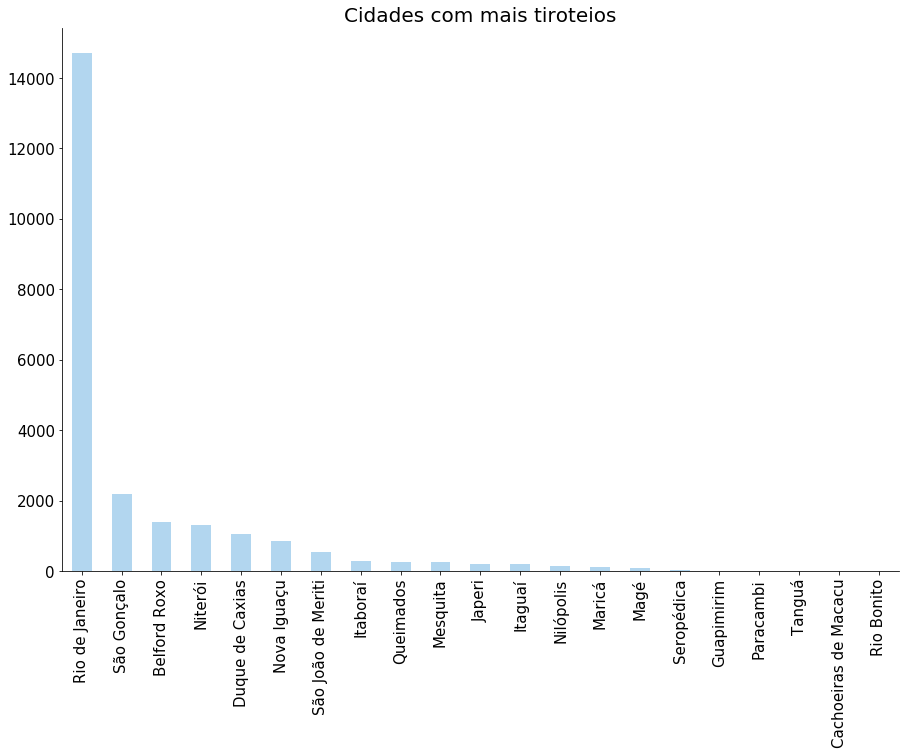

In [257]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

data['nome_cidade'].value_counts().plot.bar(color='#007acc', alpha=0.3, linewidth=5)

plt.title('Cidades com mais tiroteios',fontsize = 20)

plt.xticks(rotation = 90)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

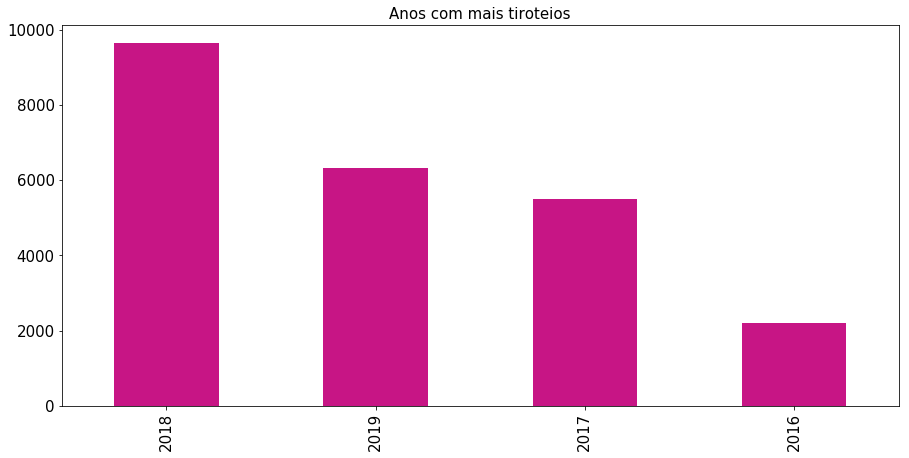

In [258]:
data['year'].value_counts().plot.bar(color = 'mediumvioletred', figsize = (15, 7))

plt.title('Anos com mais tiroteios',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

## Policiais Mortos

In [259]:
policiais_df = pd.read_csv('PoliciaisMortos.csv', sep=';', encoding='latin-1')

# check the shape of the data
delegacias_df.shape

(138, 4)

In [260]:
policiais_df.head()

,CISP,mes,vano,pol_militares_mortos_serv,pol_civis_mortos_serv
0,1,1,2003,0,0
1,4,1,2003,0,0
2,5,1,2003,0,0
3,6,1,2003,0,0
4,7,1,2003,0,0


###Juntando dataset principal (crimes) e o de população

In [0]:
pop_crimes = pd.merge(data_crimes, data_population, how='inner', on=['CISP','mes','vano'])

In [262]:
pop_crimes.shape

(26739, 63)

Separando os datasets por ano

In [0]:
crimes_2019 = pop_crimes.loc[pop_crimes['vano'] == 2019]
crimes_2018 = pop_crimes.loc[pop_crimes['vano'] == 2018]
crimes_2017 = pop_crimes.loc[pop_crimes['vano'] == 2017]
crimes_2016 = pop_crimes.loc[pop_crimes['vano'] == 2016]

Calculo de correlações entre crimes e população

<Figure size 432x288 with 0 Axes>

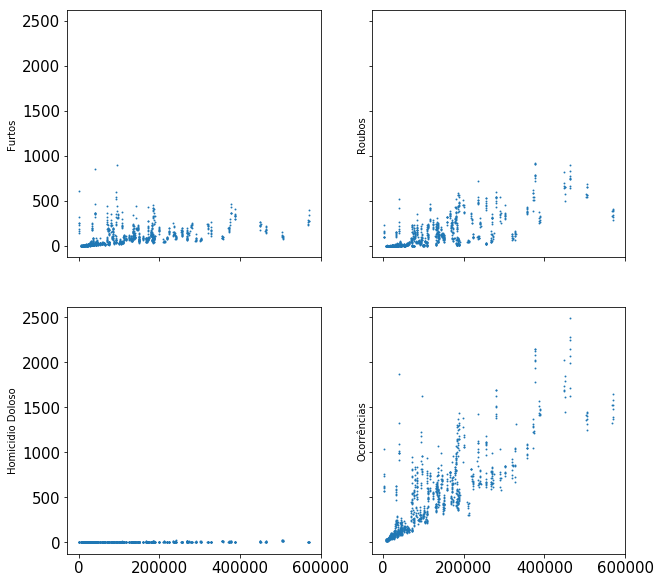

In [264]:
furtos = crimes_2019['total_furtos']
roubos = crimes_2019['total_roubos']
homicidio_dol = crimes_2019['hom_doloso']
ocorrencias = crimes_2019['registro_ocorrencias']
pop = crimes_2019['pop_circ']

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(10,10))

axes[0][0].scatter(pop, furtos, s= 0.8)
axes[0][0].set_ylabel('Furtos', labelpad = 5)

axes[0][1].scatter(pop, roubos, s= 0.8)
axes[0][1].set_ylabel('Roubos', labelpad = 5)

axes[1][0].scatter(pop, homicidio_dol, s= 0.8)
axes[1][0].set_ylabel('Homicidio Doloso')

axes[1][1].scatter(pop, ocorrencias, s= 0.8)
axes[1][1].set_ylabel('Ocorrências')

plt.show()

Depois seria legal fazer um scatter da soma de todos os crimes por população

In [0]:
fogo_2019 = data.loc[data['year'] == 2019]
fogo_2018 = data.loc[data['year'] == 2018]
fogo_2017 = data.loc[data['year'] == 2017]
fogo_2016 = data.loc[data['year'] == 2016]

## Começando a trabalhar com o dataset de Feminícidio

In [266]:
feminicidio_df = pd.read_csv('BaseFeminicidioEvolucaoMensalCisp.csv', sep=';', encoding='latin-1')

# check the shape of the data
feminicidio_df.shape

(4822, 6)

In [0]:
feminicidio_df.rename(columns={"cisp": "CISP"}, inplace=True)

* base de dados começa em 10/2016 
termina em 08/2019
* não há valores null


In [268]:
feminicidio_df.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


In [269]:
feminicidio_df.isnull().sum()

CISP                     0
vano                     0
mes                      0
feminicidio              0
feminicidio_tentativa    0
FASE                     0
dtype: int64

In [0]:
sum_perano_fem = feminicidio_df.groupby(['vano']).sum()

#### queria plotar esses 2 graficos abaixo juntos

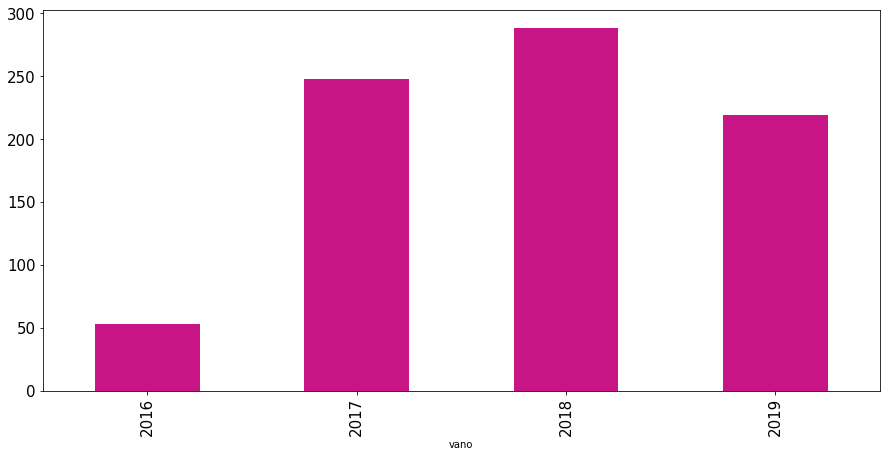

In [271]:
# queria plotar esses 2 graficos abaixo juntos
sum_perano_fem['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

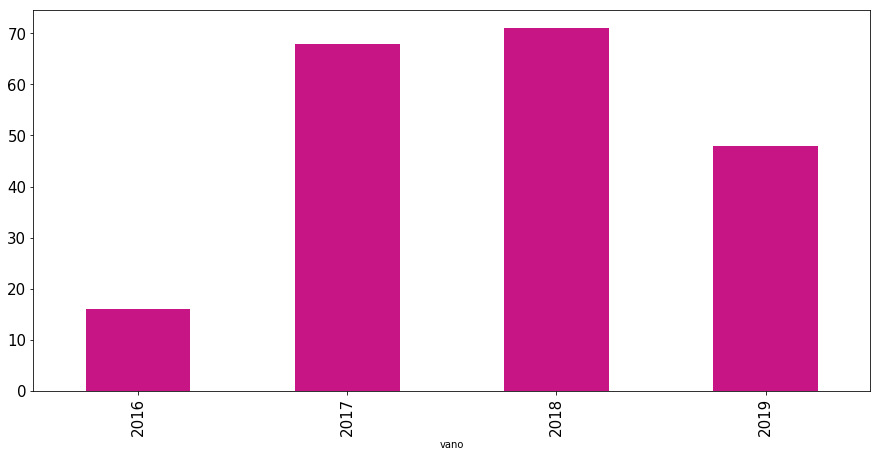

In [272]:
sum_perano_fem['feminicidio'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

In [0]:
def mode(a):
    u, c = np.unique(a, return_counts=True)
    return u[c.argmax()]

In [274]:
feminicidio_df.groupby(['vano']).apply(mode)

vano
2016    0
2017    0
2018    0
2019    0
dtype: int64

In [0]:
fem_2019 = feminicidio_df.loc[feminicidio_df['vano'] == 2019]
fem_2018 = feminicidio_df.loc[feminicidio_df['vano'] == 2018]
fem_2017 = feminicidio_df.loc[feminicidio_df['vano'] == 2017]
fem_2016 = feminicidio_df.loc[feminicidio_df['vano'] == 2016]

In [276]:
fem_2016.head()

,CISP,vano,mes,feminicidio,feminicidio_tentativa,FASE
0,1,2016,10,0,0,3
1,4,2016,10,0,0,3
2,5,2016,10,0,0,3
3,6,2016,10,0,1,3
4,7,2016,10,0,0,3


#### seria legal plotar um gráfico com 4 barrinhas (ou 2 pq só 2017 e 2018 tao completos) pra ver a evolução de feminicidio por mes por ano pra ver se tem uma tendencia mensal ao longo dos anos

In [277]:
fem_2016.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
10,11246,278208,2,10,414
11,11246,278208,10,22,414
12,11246,278208,4,21,414


In [278]:
fem_2017.groupby(['mes']).sum()

,CISP,vano,feminicidio,feminicidio_tentativa,FASE
mes,,,,,
1,11246,278346,7,25,414
2,11246,278346,7,14,414
3,11246,278346,6,26,414
4,11246,278346,7,28,414
5,11246,278346,3,12,414
6,11246,278346,7,14,414
7,11246,278346,4,18,414
8,11246,278346,5,24,414
9,11246,278346,6,15,414


In [0]:
sum_fem_mes_2018 = fem_2018.groupby(['mes']).sum()

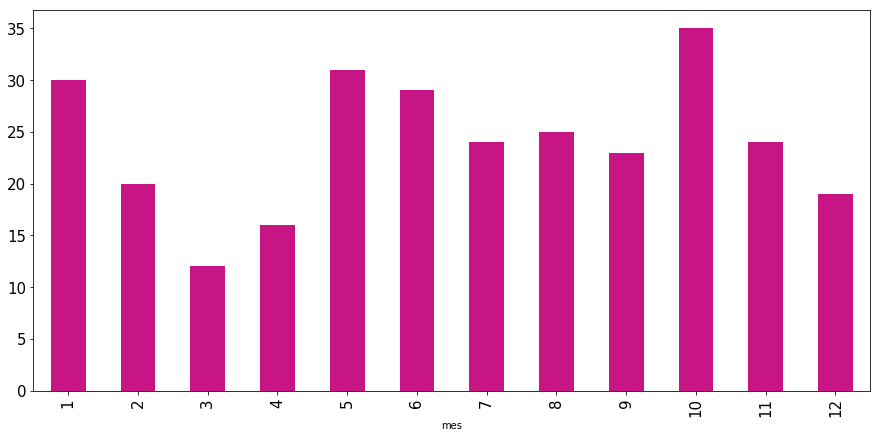

In [280]:
sum_fem_mes_2018['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

In [0]:
sum_fem_mes_2019 = fem_2019.groupby(['mes']).sum()

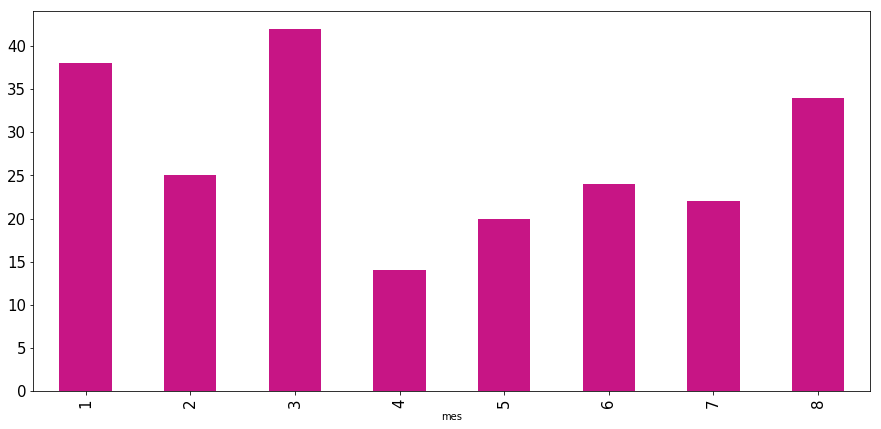

In [282]:
sum_fem_mes_2019['feminicidio_tentativa'].plot.bar(color = 'mediumvioletred', figsize = (15, 7))

### Juntando pop com feminícidio

In [0]:
join_pop_fem = pd.merge(data_population, feminicidio_df, how='inner', on=['CISP','vano', 'mes'])


In [284]:
join_pop_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE
0,1,10,2016,1685.217628,0,0,3
1,1,11,2016,1686.288969,0,0,3
2,1,12,2016,1687.360991,0,0,3
3,1,1,2017,1688.433694,0,0,3
4,1,2,2017,1689.507080,0,0,3


### Juntando o anterior (pop x fem) com o de crimes

Isso pra pegar o nome dos munícipios.

mcirc é o código IBGE deles!!!

In [0]:
join_pop_fem_crimes = pd.merge(join_pop_fem, data_crimes, how='inner', on=['CISP', 'mes', 'vano'])
join_pop_fem_crimes.drop(inplace=True, columns=['mes_ano', 'hom_doloso', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'indicador_letalidade', 'indicador_roubo_rua', 'indicador_roubo_veic', 'registro_ocorrencias'])



In [286]:
join_pop_fem_crimes.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,munic,mcirc,Regiao
0,1,10,2016,1685.217628,0,0,3,5,1,Rio de Janeiro,3304557,Capital
1,1,11,2016,1686.288969,0,0,3,5,1,Rio de Janeiro,3304557,Capital
2,1,12,2016,1687.360991,0,0,3,5,1,Rio de Janeiro,3304557,Capital
3,1,1,2017,1688.433694,0,0,3,5,1,Rio de Janeiro,3304557,Capital
4,1,2,2017,1689.507080,0,0,3,5,1,Rio de Janeiro,3304557,Capital


In [287]:
sum_fem = join_pop_fem_crimes.groupby(['munic']).sum()
sum_fem.head()

,CISP,mes,vano,pop_circ,feminicidio,feminicidio_tentativa,FASE,AISP,RISP,mcirc
munic,,,,,,,,,,
Angra dos Reis,5810,225,70620,7.112309e+06,1,22,103,1155,175,115503500
Araruama,4130,225,70620,4.601110e+06,4,5,103,875,140,115507315
Armação dos Búzios,4445,225,70620,1.189093e+06,0,2,103,875,140,115508155
Arraial do Cabo,4620,225,70620,1.043426e+06,2,2,103,875,140,115509030
Barra Mansa,3150,225,70620,6.347183e+06,1,21,103,980,175,115514245


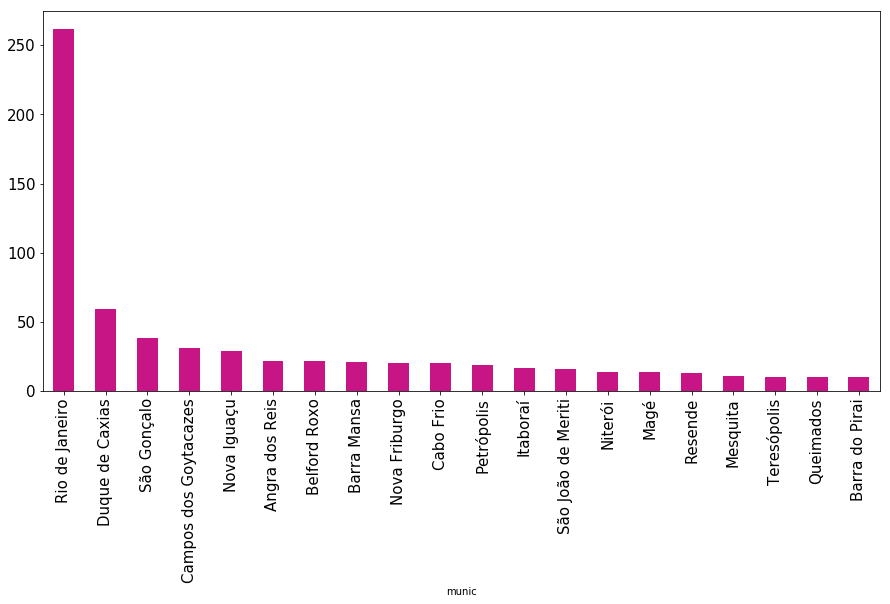

In [288]:
sum_fem['feminicidio_tentativa'].sort_values(ascending=False).nlargest(20).plot.bar(color = 'mediumvioletred', figsize = (15, 7))

## UPPs